In [58]:
# System imports
from os import path
from os import listdir
import os
import math
import random

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Same folder as project notebook
datadir = "./"
# Target image
target_image = "GW_target_image_big2.jpeg"
# Image folder name
raw_images = datadir + "images_raw"
# Test Image folder name
test_images = datadir + "images_test"
# TODO Change to actual folder
images_folder = test_images





In [4]:
# Read images names from directory
image_files_names = [f for f in os.listdir(images_folder) if path.isfile(path.join(images_folder, f)) and f.endswith(('.jpg', '.png', 'jpeg'))]
# Print number of images
print(len(image_files_names))
# Print image name example
print(image_files_names[1])

809
Abraham Lincoln_194.jpg


In [5]:
def read_image(image_path: str) -> np.ndarray:
    '''
    Reads image from image path, and
    return floating point RGB image

    Args:
        image_path: path to image

    Returns:
        RGB image of shape H x W x 3 in floating point format
    '''
    # read image and convert to RGB
    bgr_image = cv2.imread(image_path)
    if bgr_image.shape[2] > 1:
        rgb_image = bgr_image[:, :, [2, 1, 0]]
    # TODO remove when images are of the correct size (160x160)
    rgb_image = cv2.resize(rgb_image, (160,160))
    return rgb_image.astype(np.float32) / 255

(160, 160, 3)
(160, 160)


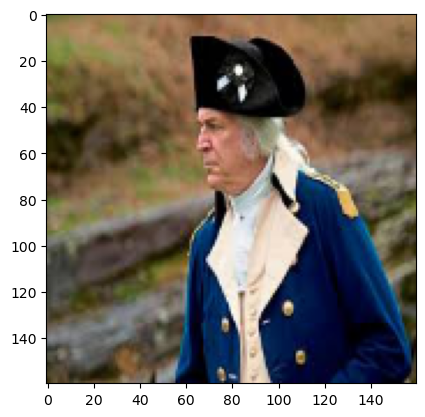

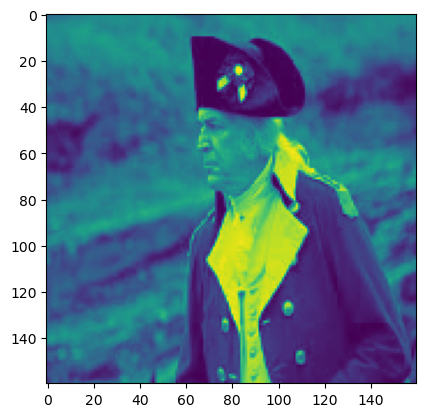

In [6]:
# Test, read one image from folder and display
image_path = datadir + images_folder + "/" + image_files_names[8]
image = read_image(image_path)
print(image.shape)
plt.figure()
plt.imshow(image)
# Take average of the three channels and display
ave_image = image.mean(axis=2)
print(ave_image.shape)
plt.figure()
plt.imshow(ave_image)

(160, 160, 809)


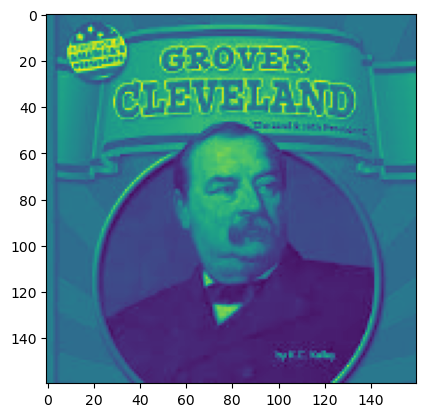

In [7]:
# Create data structure with RGB averaged images:
images_averages = np.zeros((160, 160, len(image_files_names)))
print(images_averages.shape)
counter = 0
for image in image_files_names:
    images_averages[:,:,counter] = read_image(datadir + images_folder + "/" + image).mean(axis=2)
    counter += 1

# Display an example of averaged image:
plt.figure()
plt.imshow(images_averages[:,:,486])



(9600, 9600, 3)


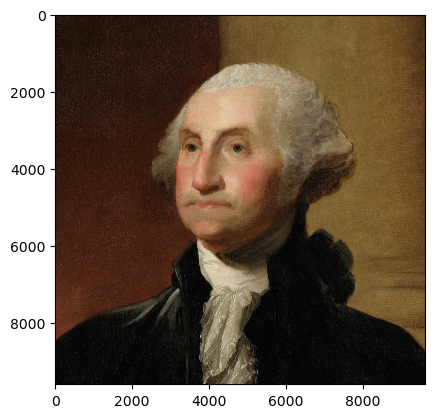

In [59]:
# Read target image:
target = cv2.imread(datadir + target_image)[:,:,[2,1,0]]/255
print(target.shape)
plt.figure()
plt.imshow(target)

In [60]:
#Number of horizontal and vertical mosaic tiles:
H_tiles = int(target.shape[1]/160)
V_tiles = int(target.shape[0]/160)

print("Number of 160x160 tiles: ", H_tiles,"x", V_tiles," total = ", H_tiles * V_tiles)

Number of 160x160 tiles:  60 x 60  total =  3600


In [61]:
# Create output image:
output = np.zeros(target.shape)
score = np.zeros(images_averages.shape[2])
# Create mosaic

for h in range(H_tiles):
    for v in range(V_tiles):
        patch = (target[v*160:v*160+160, h*160:h*160+160,:]).mean(axis=2)

        for sample in range(images_averages.shape[2]):
            err = np.linalg.norm(cv2.subtract(images_averages[:,:,sample],  patch))
            score[sample] = err
        sorted_indexes = np.argsort(score)
        random_index = random.randint(0,15)
        tile = read_image(datadir + images_folder + "/" + image_files_names[sorted_indexes[random_index]])
        output[v*160:v*160+160, h*160:h*160+160,:] = tile



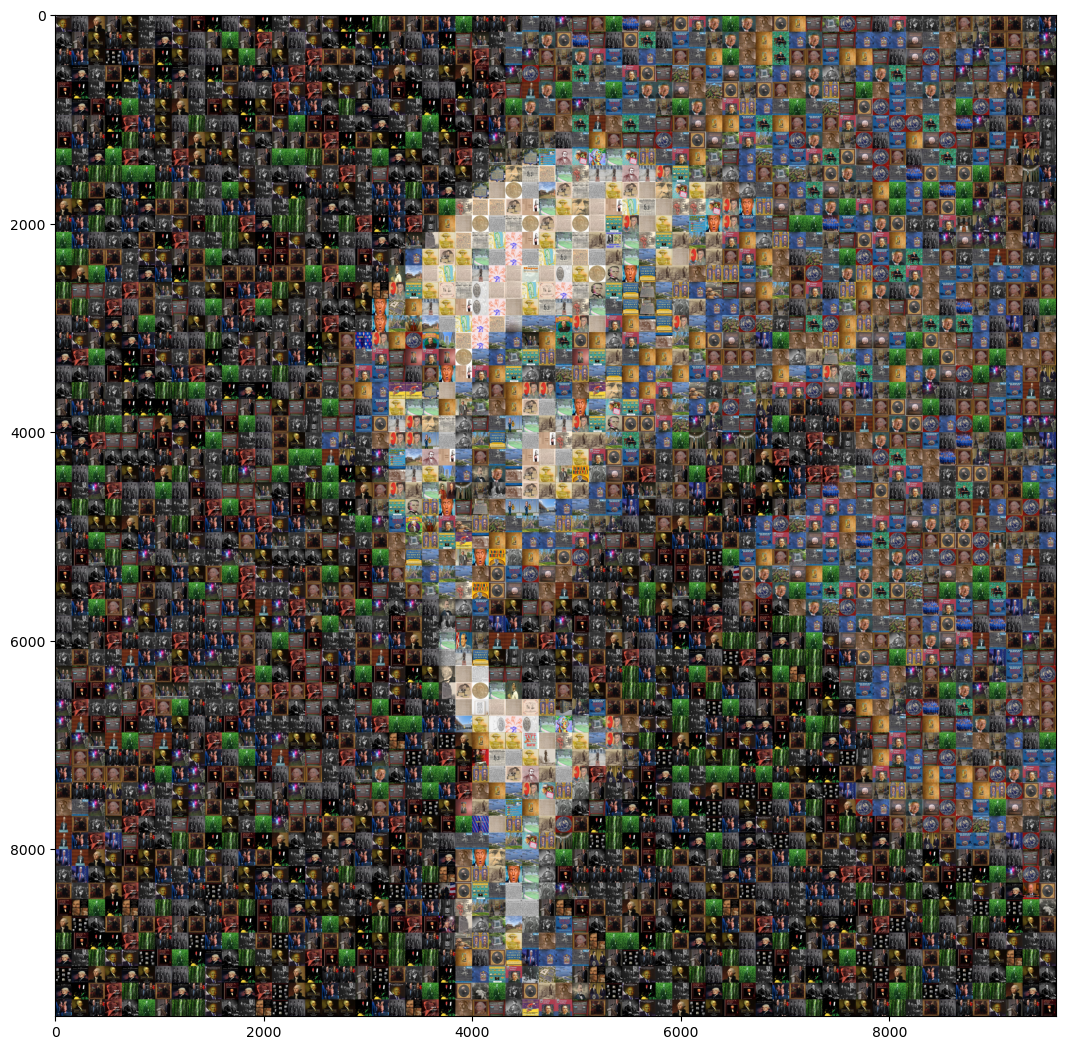

In [62]:

plt.figure(figsize=(13, 13))
plt.imshow(output)